In [0]:
import os
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import datetime as dt

# JOINING OF THE CSV FILES

In [4]:
pwd

'/content/drive/My Drive/PHD FORECAST'

In [0]:
os.chdir("/content/drive/My Drive/PHD FORECAST")

In [0]:
a=[]
while(1):
  a.append('1')

In [0]:
Train = pd.read_csv("train.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
Train.shape

(101688779, 5)

# SAMPLING THE TRAIN DATA

In [0]:
rows=Train.sample(frac=0.2,random_state=123)

In [0]:
rows.shape

(20337756, 5)

In [0]:
rows.to_csv("/content/drive/My Drive/PHD FORECAST/rows_sample.csv",index=False,header=True)

In [0]:
train_sample_data=pd.read_csv("/content/drive/My Drive/PHD FORECAST/rows_sample.csv")

In [0]:
train_sample_data.shape

(20337756, 5)

In [0]:
train_transactions = pd.read_csv('train_transactions.csv')
location_details = pd.read_csv('location_details.csv')
Item_details = pd.read_csv('item_details.csv')

In [0]:
train_sample_data.shape

(20337756, 5)

In [0]:
train_transactions.shape

(71391, 3)

In [0]:
location_details.shape

(54, 5)

In [0]:
Item_details.shape

(4100, 4)

In [0]:
tr=train_sample_data

In [0]:
print(tr.columns)
print(train_transactions.columns)
print(location_details.columns)
print(Item_details.columns)

Index(['date', 'locationId', 'item_id', 'unit_sales', 'onpromotion'], dtype='object')
Index(['date', 'location_identifier', 'transactions'], dtype='object')
Index(['location_id', 'city', 'state', 'type', 'cluster'], dtype='object')
Index(['item_id', 'category_of_item', 'class', 'perishable'], dtype='object')


In [0]:
tr.rename(columns = {'locationId':'location_id'}, inplace = True)


In [0]:
print(tr.columns)

Index(['date', 'location_id', 'item_id', 'unit_sales', 'onpromotion'], dtype='object')


In [0]:
join_1 =pd.merge(left=tr, right=Item_details, how='left', left_on='item_id', right_on='item_id') 

In [0]:
join_1.shape

(20337756, 8)

In [0]:
join_1.head()

,date,location_id,item_id,unit_sales,onpromotion,category_of_item,class,perishable
0,2017-10-06,location_45,item_454326,8.0,False,grocery_items,class_1044,0
1,2017-04-28,location_31,item_804098,2.0,False,processed_food,class_2854,1
2,2018-06-05,location_42,item_1929795,23.0,False,grocery_items,class_1016,0
3,2015-03-16,location_26,item_870544,2.0,NaN,personal_care,class_4126,0
4,2017-12-30,location_50,item_1466819,2.0,False,cleaning_utilities,class_3018,0


In [0]:
join_2 = pd.merge(left=join_1, right=location_details, how='left', left_on='location_id', right_on='location_id')

In [0]:
join_2.head()

,date,location_id,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,2017-10-06,location_45,item_454326,8.0,False,grocery_items,class_1044,0,Bengaluru,Karnataka,A,11
1,2017-04-28,location_31,item_804098,2.0,False,processed_food,class_2854,1,Nagpur,Maharashtra,B,10
2,2018-06-05,location_42,item_1929795,23.0,False,grocery_items,class_1016,0,Hyderabad,Telangana,D,2
3,2015-03-16,location_26,item_870544,2.0,NaN,personal_care,class_4126,0,Mumbai,Maharashtra,D,10
4,2017-12-30,location_50,item_1466819,2.0,False,cleaning_utilities,class_3018,0,Gurgaon,Haryana,A,14


In [0]:
join_2.shape

(20337756, 12)

# storing the merged sampled data in the f_s dataframe

In [0]:
sales_forecast_sample=join_2

In [0]:
sales_forecast_sample.to_csv("/content/drive/My Drive/PHD FORECAST/20_percent_train_merged.csv",index=False,header=True)

In [0]:
f_s=pd.read_csv('/content/drive/My Drive/PHD FORECAST/20_percent_train_merged.csv')

# PERFORMING EDA ON THE f_s DATE FRAME WHICH HAS ONLY 20% OF THE TRAIN DATA IN DATA FRAME

In [0]:
f_s.describe()

,unit_sales,perishable,cluster
count,2.033776e+07,2.033776e+07,2.033776e+07
mean,8.646749e+00,2.518629e-01,8.737434e+00
std,2.136936e+01,4.340829e-01,4.636242e+00
min,-3.451363e+03,0.000000e+00,1.000000e+00
25%,2.000000e+00,0.000000e+00,4.000000e+00
50%,4.000000e+00,0.000000e+00,9.000000e+00
75%,9.000000e+00,1.000000e+00,1.300000e+01
max,2.000000e+04,1.000000e+00,1.700000e+01


In [0]:
f_s.head()

,date,location_id,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,2017-10-06,location_45,item_454326,8.0,False,grocery_items,class_1044,0,Bengaluru,Karnataka,A,11
1,2017-04-28,location_31,item_804098,2.0,False,processed_food,class_2854,1,Nagpur,Maharashtra,B,10
2,2018-06-05,location_42,item_1929795,23.0,False,grocery_items,class_1016,0,Hyderabad,Telangana,D,2
3,2015-03-16,location_26,item_870544,2.0,NaN,personal_care,class_4126,0,Mumbai,Maharashtra,D,10
4,2017-12-30,location_50,item_1466819,2.0,False,cleaning_utilities,class_3018,0,Gurgaon,Haryana,A,14


In [0]:
f_s.isnull().sum()

date                      0
location_id               0
item_id                   0
unit_sales                0
onpromotion         4328867
category_of_item          0
class                     0
perishable                0
city                      0
state                     0
type                      0
cluster                   0
dtype: int64

In [0]:
f_s['date'] = pd.to_datetime(f_s['date'])

In [0]:
f_s['date']

0          2017-10-06
1          2017-04-28
2          2018-06-05
3          2015-03-16
4          2017-12-30
              ...    
20337751   2018-09-14
20337752   2017-08-22
20337753   2016-06-04
20337754   2015-05-07
20337755   2017-07-28
Name: date, Length: 20337756, dtype: datetime64[ns]

In [0]:
import matplotlib.pyplot as plt

#  TREND OF THE MONTHLY SALES OF THE UNIT SALES[20% OF THE TRAIN MERGED WITH THE OTHER FILES EXCEPT THE TRANSACTIONS.CSV]

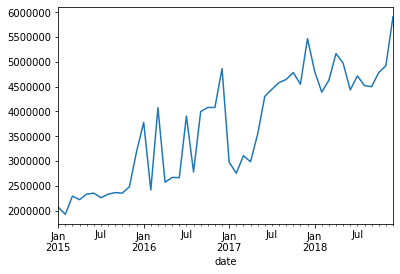

In [0]:
mon=f_s.groupby(pd.Grouper(key='date', freq='1M')).sum()['unit_sales']
mon.plot()

# DAILY BASED TREND OF THE UNIT SALES FOR f_s

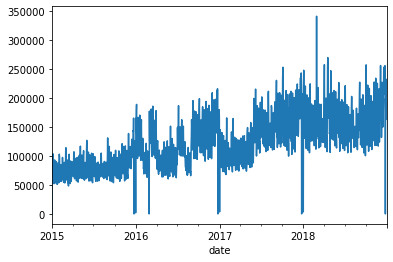

In [0]:
d=f_s.groupby(pd.Grouper(key='date', freq='D')).sum()['unit_sales']
d.plot()

# QUARTERLY UNIT SALES TREND

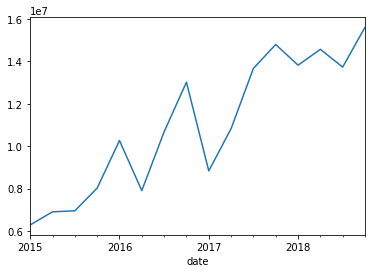

In [0]:
Q=f_s.groupby(pd.Grouper(key='date', freq='Q')).sum()['unit_sales']
Q.plot()

# WHAT IS DOMINANT TYPE WHEN CHECKED WITH THE CATEGORY_OF_ITEM
# AND THE INFERENCE IS THAT THE TYPE D HAS BEEN DOMINANT AMONG ALL THE CATEGORIES

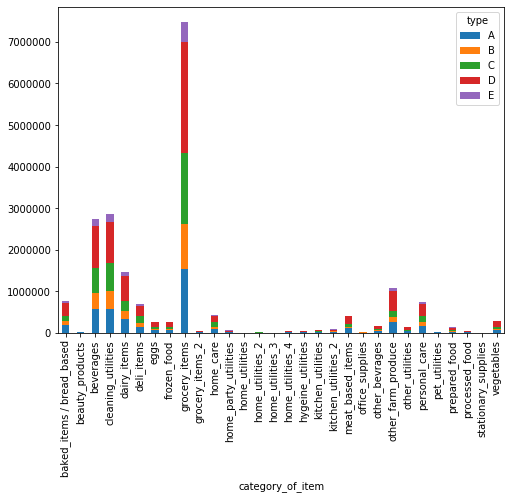

In [0]:
cate=pd.crosstab(f_s['category_of_item'],f_s['type'])
cate.plot(kind='bar',stacked=True,figsize=(8,6))

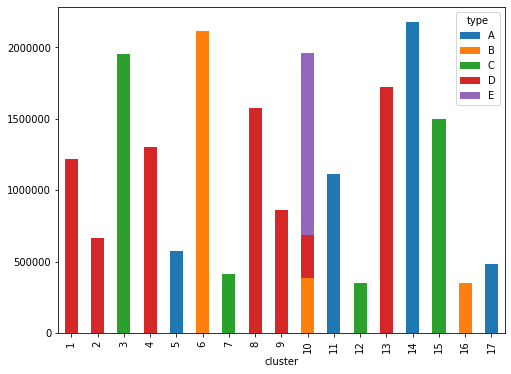

In [0]:
clu=pd.crosstab(f_s['cluster'],f_s['type'])
clu.plot(kind='bar',stacked=True,figsize=(8,6))

In [0]:
unit_clus= f_s.groupby('cluster', as_index=False)['unit_sales'].\
    mean().dropna().sort_values('unit_sales', ascending=False)
unit_clus.head()

,cluster,unit_sales
4,5,17.936395
10,11,14.317501
13,14,12.001259
16,17,11.348757
7,8,11.313710


In [0]:
unit_clus.tail()

,cluster,unit_sales
3,4,6.322892
14,15,6.182325
15,16,6.121342
8,9,5.969471
6,7,5.872098


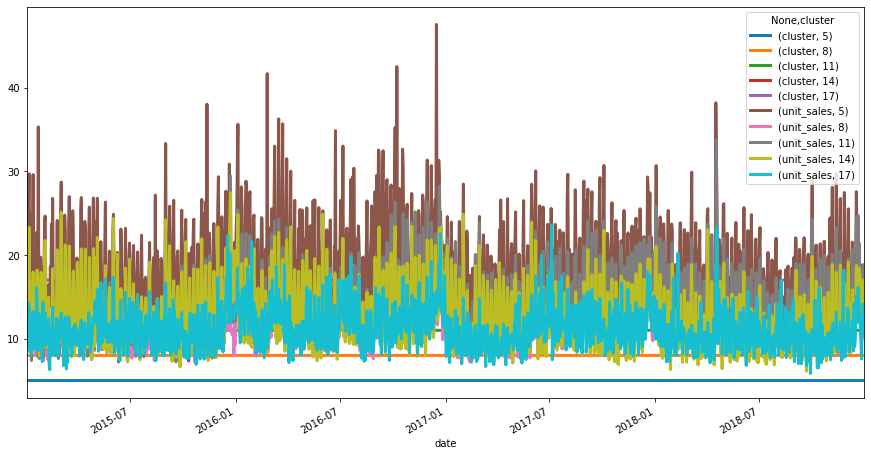

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
clusterlist = [5,11,14,8,17]
clusterserie = pd.DataFrame(f_s[(f_s['cluster'].\
    isin(clusterlist))][['date','cluster','unit_sales']].\
    dropna().\
    groupby(['date', 'cluster'])['cluster','unit_sales'].mean().unstack())
clusterserie.plot(figsize=(15,8), linewidth=3)
plt.show()

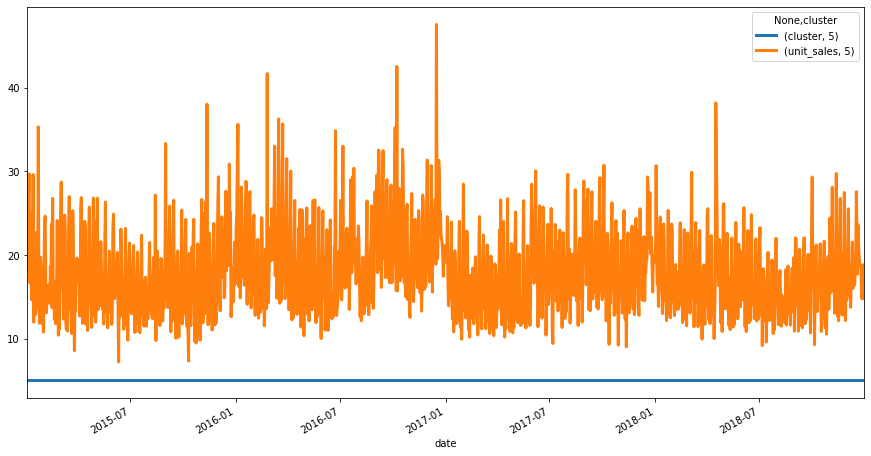

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
clusterlist = [5]
clusterserie = pd.DataFrame(f_s[(f_s['cluster'].\
    isin(clusterlist))][['date','cluster','unit_sales']].\
    dropna().\
    groupby(['date', 'cluster'])['cluster','unit_sales'].mean().unstack())
clusterserie.plot(figsize=(15,8), linewidth=3)
plt.show()

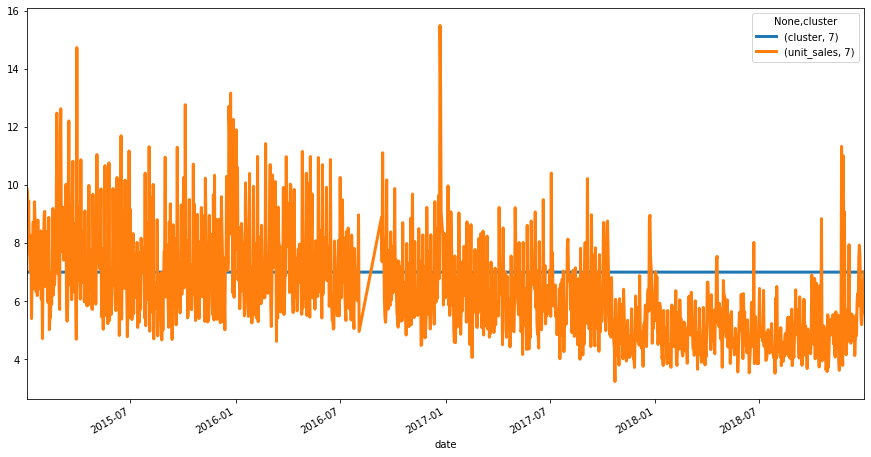

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
clusterlist = [7]
clusterserie = pd.DataFrame(f_s[(f_s['cluster'].\
    isin(clusterlist))][['date','cluster','unit_sales']].\
    dropna().\
    groupby(['date', 'cluster'])['cluster','unit_sales'].mean().unstack())
clusterserie.plot(figsize=(15,8), linewidth=3)
plt.show()

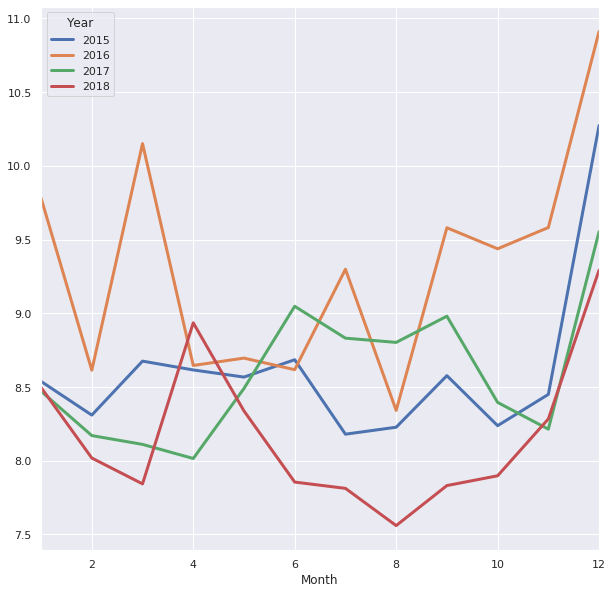

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
sns.set()
season = f_s
season['Date'] = f_s.date
season['Year'] = f_s['date'].dt.year
season['Month'] = f_s['date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'unit_sales', aggfunc=np.mean)
spivot.plot(figsize=(10,10), linewidth=3)
plt.show()

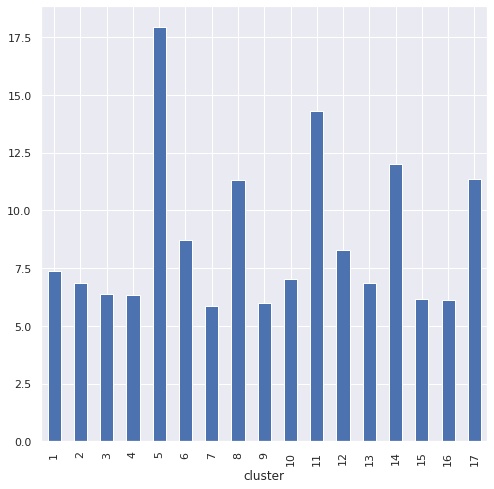

In [0]:
f_s.groupby('cluster').mean()['unit_sales'].plot(kind="bar",figsize=(8,8))

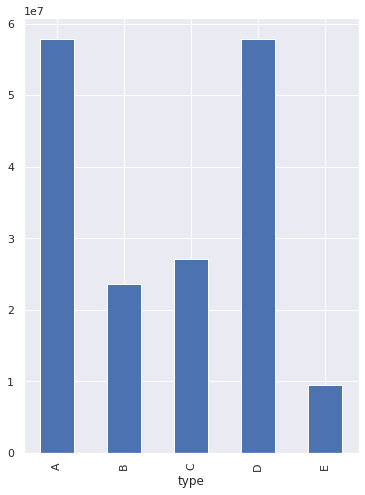

In [0]:
f_s.groupby('type').sum()['unit_sales'].plot(kind="bar",figsize=(6,8))

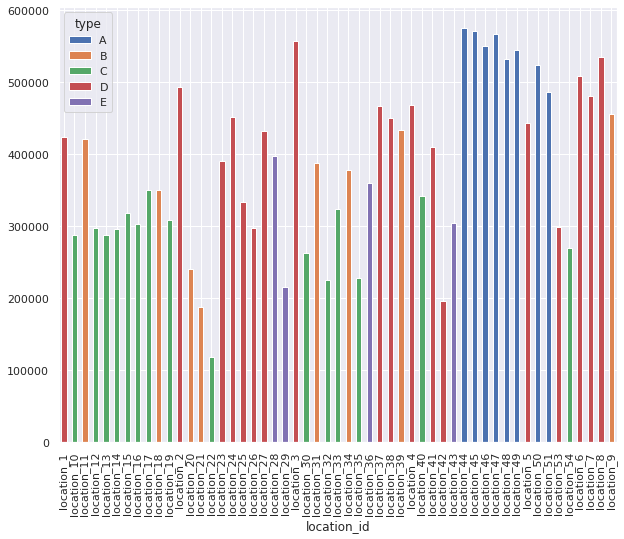

In [0]:
cluste=pd.crosstab(f_s['location_id'],f_s['type']) 
cluste.plot(kind="bar", stacked=True, figsize=(10,8))

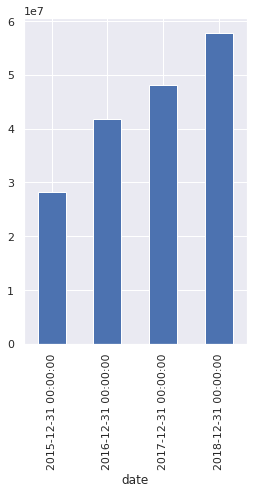

In [0]:
g_r = f_s.groupby(pd.Grouper(key='date', freq='Y')).sum()['unit_sales']
g_r.plot(kind="bar",figsize=(4,6))

In [0]:
rk=f_s[['cluster','category_of_item','unit_sales']]

In [0]:
clus=pd.crosstab(f_s['cluster'],f_s['category_of_item'])

In [0]:
clus.head(17)

category_of_item,baked_items / bread_based,beauty_products,beverages,cleaning_utilities,dairy_items,deli_items,eggs,frozen_food,grocery_items,grocery_items_2,home_care,home_party_utilities,home_utilities,home_utilities_2,home_utilities_3,home_utilities_4,hygeine_utilities,kitchen_utilities,kitchen_utilities_2,meat_based_items,office_supplies,other_bevrages,other_farm_produce,other_utilities,personal_care,pet_utilities,prepared_food,processed_food,stationary_supplies,vegetables
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,49850,1845,164374,154734,103629,38526,18850,17908,414947,2826,23364,3434,149,1019,14,2009,1705,4213,3983,33262,118,12720,78012,7193,42098,1783,9089,3582,21,21054
2,26981,1086,92099,82585,52200,16576,9241,9940,233618,1976,14717,1775,105,792,2,1323,2664,1870,2363,13224,95,6506,48026,3684,23226,1167,4884,1976,28,9190
3,55688,940,268541,319212,113016,71799,21813,17374,789027,2649,44438,3465,335,623,141,2358,76,6693,9199,30136,281,12787,74264,12331,66438,510,9968,1386,0,19347
4,49542,2214,165029,179336,97775,42532,18521,19496,471723,3081,27934,4162,203,1322,17,2085,3829,4111,4833,27261,144,11932,74940,10320,51693,1398,8471,2518,26,16694
5,22973,1318,75281,76601,43005,18243,8228,9139,200307,1888,10780,2030,191,547,0,1550,1888,2417,3433,14283,827,6263,32042,5470,20303,1099,3993,1928,13,10017
6,83176,2901,291561,306936,136577,75107,22856,20833,806514,4078,49277,5468,433,1072,200,3749,4404,9332,11255,27430,1839,15211,100612,15794,80286,1566,12906,2782,0,22632
7,10736,307,55871,65525,25381,14819,3786,4220,166702,522,11127,1048,61,331,27,767,95,2392,2279,5348,73,2587,17026,2197,14595,135,2697,372,0,4138
8,65406,3006,206971,202560,123569,46219,24470,24125,543997,5061,30663,5611,496,1499,43,3023,5402,5740,6562,40583,213,15855,95178,13870,55328,2595,11729,5238,40,28005
9,34880,1021,117246,110028,70540,27541,12526,12737,298949,2557,16320,2032,150,689,0,1177,2392,1767,1980,23347,81,7530,53376,3666,29531,845,6264,2616,19,16185


# WHAT TYPE HAS THE PARTICULAR CATEGORY HAS 

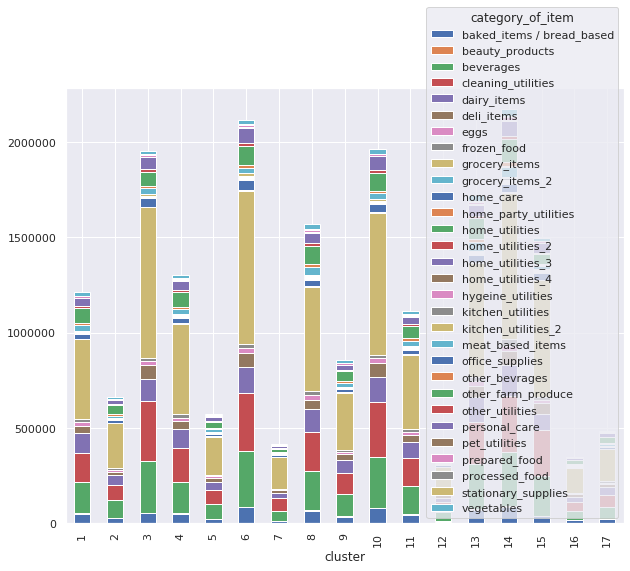

In [0]:
clus.head()
clus.plot(kind="bar", stacked=True, figsize=(10,8))

In [0]:
f_s.head()

,date,location_id,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,2017-10-06,location_45,item_454326,8.0,False,grocery_items,class_1044,0,Bengaluru,Karnataka,A,11
1,2017-04-28,location_31,item_804098,2.0,False,processed_food,class_2854,1,Nagpur,Maharashtra,B,10
2,2018-06-05,location_42,item_1929795,23.0,False,grocery_items,class_1016,0,Hyderabad,Telangana,D,2
3,2015-03-16,location_26,item_870544,2.0,NaN,personal_care,class_4126,0,Mumbai,Maharashtra,D,10
4,2017-12-30,location_50,item_1466819,2.0,False,cleaning_utilities,class_3018,0,Gurgaon,Haryana,A,14


In [0]:
f_s.dtypes

date                datetime64[ns]
location_id                 object
item_id                     object
unit_sales                 float64
onpromotion                 object
category_of_item            object
class                       object
perishable                   int64
city                        object
state                       object
type                        object
cluster                      int64
dtype: object

In [0]:
forecast_model=f_s

In [0]:
forecast_model.head()

,date,location_id,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,2017-10-06,location_45,item_454326,8.0,False,grocery_items,class_1044,0,Bengaluru,Karnataka,A,11
1,2017-04-28,location_31,item_804098,2.0,False,processed_food,class_2854,1,Nagpur,Maharashtra,B,10
2,2018-06-05,location_42,item_1929795,23.0,False,grocery_items,class_1016,0,Hyderabad,Telangana,D,2
3,2015-03-16,location_26,item_870544,2.0,NaN,personal_care,class_4126,0,Mumbai,Maharashtra,D,10
4,2017-12-30,location_50,item_1466819,2.0,False,cleaning_utilities,class_3018,0,Gurgaon,Haryana,A,14


In [0]:
forecast_model.dtypes

date                 object
location_id          object
item_id              object
unit_sales          float64
onpromotion          object
category_of_item     object
class                object
perishable            int64
city                 object
state                object
type                 object
cluster               int64
dtype: object

In [0]:
forecast_model['cluster']=forecast_model['cluster'].astype('category')

forecast_model['type']=forecast_model['type'].astype('category')

forecast_model['state']=forecast_model['state'].astype('category')

forecast_model['city']=forecast_model['city'].astype('category')

forecast_model['perishable']=forecast_model['perishable'].astype('category')

forecast_model['category_of_item']=forecast_model['category_of_item'].astype('category')

forecast_model['item_id']=forecast_model['item_id'].astype('category')

forecast_model['location_id']=forecast_model['location_id'].astype('category')

forecast_model['class']=forecast_model['class'].astype('category')

In [0]:
forecast_model.dtypes

date                  object
location_id         category
item_id             category
unit_sales           float64
onpromotion           object
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
dtype: object

In [0]:
forecast_model.onpromotion.value_counts()

False    14996326
True      1012563
Name: onpromotion, dtype: int64

In [0]:
forecast_model['onpromotion'] = forecast_model['onpromotion'].fillna(2)
forecast_model['onpromotion'] = forecast_model['onpromotion'].replace(True,1)
forecast_model['onpromotion'] = forecast_model['onpromotion'].replace(False,0)

In [0]:
forecast_model.onpromotion.value_counts(normalize=True)

0    0.737364
2    0.212849
1    0.049787
Name: onpromotion, dtype: float64

In [0]:
forecast_model.drop(['date'],axis=1, inplace = True)

In [0]:
forecast_model.dtypes

location_id         category
item_id             category
unit_sales           float64
onpromotion            int64
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
dtype: object

In [0]:
categorical_columns=forecast_model.select_dtypes(include=['category'])

In [0]:
categorical_columns.columns

Index(['location_id', 'item_id', 'category_of_item', 'class', 'perishable',
       'city', 'state', 'type', 'cluster'],
      dtype='object')

In [0]:
categorical_columns.head()

,location_id,item_id,category_of_item,class,perishable,city,state,type,cluster
0,location_45,item_454326,grocery_items,class_1044,0,Bengaluru,Karnataka,A,11
1,location_31,item_804098,processed_food,class_2854,1,Nagpur,Maharashtra,B,10
2,location_42,item_1929795,grocery_items,class_1016,0,Hyderabad,Telangana,D,2
3,location_26,item_870544,personal_care,class_4126,0,Mumbai,Maharashtra,D,10
4,location_50,item_1466819,cleaning_utilities,class_3018,0,Gurgaon,Haryana,A,14


In [0]:
categorical_columns.drop(["location_id","item_id","city","state", "class"],axis=1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
categorical_columns.columns

Index(['category_of_item', 'perishable', 'type', 'cluster'], dtype='object')

In [0]:
categorical_columns.head()

,category_of_item,perishable,type,cluster
0,grocery_items,0,A,11
1,processed_food,1,B,10
2,grocery_items,0,D,2
3,personal_care,0,D,10
4,cleaning_utilities,0,A,14


In [0]:
forecast_model.isnull().sum()

location_id         0
item_id             0
unit_sales          0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64

In [0]:
forecast_model.dtypes

location_id         category
item_id             category
unit_sales           float64
onpromotion            int64
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
dtype: object

In [0]:
forecast_model.onpromotion.value_counts()

0    14996326
2     4328867
1     1012563
Name: onpromotion, dtype: int64

In [0]:
numerical_columns=forecast_model.select_dtypes(include=['float64'])

In [0]:
numerical_columns['onpromotion']=forecast_model[['onpromotion']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
numerical_columns.dtypes

unit_sales     float64
onpromotion      int64
dtype: object

In [0]:
forecast_model.dtypes

location_id         category
item_id             category
unit_sales           float64
onpromotion            int64
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
dtype: object

In [0]:
categorical_columns.columns

Index(['category_of_item', 'perishable', 'type', 'cluster'], dtype='object')

In [0]:
cat_col=categorical_columns.columns

In [0]:
data_dumies = pd.get_dummies(columns=cat_col,data=categorical_columns,drop_first=True)


In [0]:
data_dumies.head()

,category_of_item_beauty_products,category_of_item_beverages,category_of_item_cleaning_utilities,category_of_item_dairy_items,category_of_item_deli_items,category_of_item_eggs,category_of_item_frozen_food,category_of_item_grocery_items,category_of_item_grocery_items_2,category_of_item_home_care,category_of_item_home_party_utilities,category_of_item_home_utilities,category_of_item_home_utilities_2,category_of_item_home_utilities_3,category_of_item_home_utilities_4,category_of_item_hygeine_utilities,category_of_item_kitchen_utilities,category_of_item_kitchen_utilities_2,category_of_item_meat_based_items,category_of_item_office_supplies,category_of_item_other_bevrages,category_of_item_other_farm_produce,category_of_item_other_utilities,category_of_item_personal_care,category_of_item_pet_utilities,category_of_item_prepared_food,category_of_item_processed_food,category_of_item_stationary_supplies,category_of_item_vegetables,perishable_1,type_B,type_C,type_D,type_E,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
data_dumies.columns

Index(['category_of_item_beauty_products', 'category_of_item_beverages',
       'category_of_item_cleaning_utilities', 'category_of_item_dairy_items',
       'category_of_item_deli_items', 'category_of_item_eggs',
       'category_of_item_frozen_food', 'category_of_item_grocery_items',
       'category_of_item_grocery_items_2', 'category_of_item_home_care',
       'category_of_item_home_party_utilities',
       'category_of_item_home_utilities', 'category_of_item_home_utilities_2',
       'category_of_item_home_utilities_3',
       'category_of_item_home_utilities_4',
       'category_of_item_hygeine_utilities',
       'category_of_item_kitchen_utilities',
       'category_of_item_kitchen_utilities_2',
       'category_of_item_meat_based_items', 'category_of_item_office_supplies',
       'category_of_item_other_bevrages',
       'category_of_item_other_farm_produce',
       'category_of_item_other_utilities', 'category_of_item_personal_care',
       'category_of_item_pet_utilities', 'c

In [0]:
data_dumies.dtypes

category_of_item_beauty_products         uint8
category_of_item_beverages               uint8
category_of_item_cleaning_utilities      uint8
category_of_item_dairy_items             uint8
category_of_item_deli_items              uint8
category_of_item_eggs                    uint8
category_of_item_frozen_food             uint8
category_of_item_grocery_items           uint8
category_of_item_grocery_items_2         uint8
category_of_item_home_care               uint8
category_of_item_home_party_utilities    uint8
category_of_item_home_utilities          uint8
category_of_item_home_utilities_2        uint8
category_of_item_home_utilities_3        uint8
category_of_item_home_utilities_4        uint8
category_of_item_hygeine_utilities       uint8
category_of_item_kitchen_utilities       uint8
category_of_item_kitchen_utilities_2     uint8
category_of_item_meat_based_items        uint8
category_of_item_office_supplies         uint8
category_of_item_other_bevrages          uint8
category_of_i

In [0]:
final_data=pd.concat([numerical_columns,data_dumies],axis=1)

In [0]:
final_data.head()

,unit_sales,onpromotion,category_of_item_beauty_products,category_of_item_beverages,category_of_item_cleaning_utilities,category_of_item_dairy_items,category_of_item_deli_items,category_of_item_eggs,category_of_item_frozen_food,category_of_item_grocery_items,category_of_item_grocery_items_2,category_of_item_home_care,category_of_item_home_party_utilities,category_of_item_home_utilities,category_of_item_home_utilities_2,category_of_item_home_utilities_3,category_of_item_home_utilities_4,category_of_item_hygeine_utilities,category_of_item_kitchen_utilities,category_of_item_kitchen_utilities_2,category_of_item_meat_based_items,category_of_item_office_supplies,category_of_item_other_bevrages,category_of_item_other_farm_produce,category_of_item_other_utilities,category_of_item_personal_care,category_of_item_pet_utilities,category_of_item_prepared_food,category_of_item_processed_food,category_of_item_stationary_supplies,category_of_item_vegetables,perishable_1,type_B,type_C,type_D,type_E,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,8.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,23.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
final_data.shape

(20337756, 52)

In [0]:
final_data.to_pickle("/content/drive/My Drive/PHD FORECAST/model_data.pkl")

In [0]:
model_Data.describe()

,unit_sales,onpromotion,category_of_item_beauty_products,category_of_item_beverages,category_of_item_cleaning_utilities,category_of_item_dairy_items,category_of_item_deli_items,category_of_item_eggs,category_of_item_frozen_food,category_of_item_grocery_items,category_of_item_grocery_items_2,category_of_item_home_care,category_of_item_home_party_utilities,category_of_item_home_utilities,category_of_item_home_utilities_2,category_of_item_home_utilities_3,category_of_item_home_utilities_4,category_of_item_hygeine_utilities,category_of_item_kitchen_utilities,category_of_item_kitchen_utilities_2,category_of_item_meat_based_items,category_of_item_office_supplies,category_of_item_other_bevrages,category_of_item_other_farm_produce,category_of_item_other_utilities,category_of_item_personal_care,category_of_item_pet_utilities,category_of_item_prepared_food,category_of_item_processed_food,category_of_item_stationary_supplies,category_of_item_vegetables,perishable_1,type_B,type_C,type_D,type_E,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
count,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07,2.033776e+07
mean,8.646749e+00,4.754850e-01,1.404186e-03,1.350646e-01,1.399475e-01,7.145788e-02,3.381612e-02,1.313685e-02,1.281582e-02,3.675399e-01,2.362601e-03,2.117471e-02,2.739044e-03,2.036115e-04,6.830154e-04,3.643470e-05,1.721478e-03,2.095511e-03,3.507368e-03,4.114269e-03,2.028891e-02,4.471486e-04,8.496070e-03,5.278478e-02,6.686923e-03,3.600894e-02,1.074602e-03,6.518812e-03,2.147680e-03,1.342331e-05,1.403478e-02,2.518629e-01,1.404096e-01,2.074768e-01,3.754130e-01,6.273519e-02,3.264465e-02,9.611852e-02,6.407501e-02,2.832451e-02,1.040816e-01,2.041346e-02,7.734664e-02,4.218715e-02,9.645666e-02,5.487660e-02,1.724704e-02,8.472405e-02,1.068699e-01,7.369776e-02,1.723646e-02,2.389443e-02
std,2.136936e+01,8.216427e-01,3.744616e-02,3.417925e-01,3.469326e-01,2.575882e-01,1.807556e-01,1.138608e-01,1.124792e-01,4.821352e-01,4.854914e-02,1.439664e-01,5.226415e-02,1.426780e-02,2.612564e-02,6.036006e-03,4.145497e-02,4.572877e-02,5.911909e-02,6.401048e-02,1.409868e-01,2.114116e-02,9.178174e-02,2.236036e-01,8.149974e-02,1.863124e-01,3.276351e-02,8.047557e-02,4.629328e-02,3.663759e-03,1.176342e-01,4.340829e-01,3.474115e-01,4.054999e-01,4.842294e-01,2.424861e-01,1.777048e-01,2.947537e-01,2.448865e-01,1.658983e-01,3.053664e-01,1.414099e-01,2.671407e-01,2.010159e-01,2.952165e-01,2.277392e-01,1.301905e-01,2.784706e-01,3.089477e-01,2.612784e-01,1.301513e-01,1.527203e-01
min,-3.451363e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0

REMOVING NEGEATIVES IN UNIT_SALES

In [0]:
model_Data['unit_sales']=np.where((model_Data.unit_sales<=0),0,model_Data.unit_sales)

In [0]:
model_Data=pd.read_pickle("/content/drive/My Drive/PHD FORECAST/model_data.pkl")

In [0]:
model_Data.describe()

In [0]:
model_Data.shape

(20337756, 52)

In [0]:
X = model_Data.loc[:,model_Data.columns!='unit_sales'].values
Y = model_Data.loc[:,'unit_sales'].values
print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)

X.shape:  (20337756, 51)
Y.shape:  (20337756,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [0]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_test)

In [0]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_train - y_train_pred) / y_train))*100 

In [0]:
print('Training mape: ', MAPE(y_train, y_train_pred))
print('Validation mape: ', MAPE(y_test, y_val_pred))

Training mape:  212.4650614883408
Validation mape:  212.4650614883408


In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
mean_absolute_error(y_train,y_train_pred)

7.390861704865557

In [0]:
mean_absolute_error(y_test,y_val_pred)

7.399140705015381

# TEST FILE READING AND PREPROCESSING

In [0]:
test_data=pd.read_csv("test.csv")

In [0]:
test_data.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [0]:
train_transactions = pd.read_csv('train_transactions.csv')
location_details = pd.read_csv('location_details.csv')
Item_details = pd.read_csv('item_details.csv')

In [0]:
location_details.columns

Index(['location_id', 'city', 'state', 'type', 'cluster'], dtype='object')

In [0]:
test_data.rename(columns = {'locationId':'location_id'}, inplace = True)

In [0]:
test_data.head()

,id,date,location_id,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [0]:
test_data.head()

,id,date,location_id,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [0]:
test_join_1 =pd.merge(left=test_data, right=Item_details, how='left', left_on='item_id', right_on='item_id') 

In [0]:
test_join_1.head()

,id,date,location_id,item_id,onpromotion,category_of_item,class,perishable
0,0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0
1,1,2019-01-01,location_25,item_103665,False,baked_items / bread_based,class_2712,1
2,2,2019-01-01,location_25,item_105574,False,grocery_items,class_1045,0
3,3,2019-01-01,location_25,item_105857,False,grocery_items,class_1092,0
4,4,2019-01-01,location_25,item_106716,False,grocery_items,class_1032,0


In [0]:
test_join_2 =pd.merge(left=test_join_1, right=location_details, how='left', left_on='location_id', right_on='location_id')

In [0]:
test_join_2.to_csv('/content/drive/My Drive/PHD FORECAST/nk_test_joined.csv',header=True,index=False)

NameError: ignored

In [0]:
test_final=pd.read_csv('/content/drive/My Drive/PHD FORECAST/nk_test_joined.csv')

In [0]:
test_final.head()

,id,date,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1
1,1,2019-01-01,location_25,item_103665,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
2,2,2019-01-01,location_25,item_105574,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1
3,3,2019-01-01,location_25,item_105857,False,grocery_items,class_1092,0,Kanpur,Uttar Pradesh,D,1
4,4,2019-01-01,location_25,item_106716,False,grocery_items,class_1032,0,Kanpur,Uttar Pradesh,D,1


In [0]:
test_final.dtypes

id                   int64
date                object
location_id         object
item_id             object
onpromotion           bool
category_of_item    object
class               object
perishable           int64
city                object
state               object
type                object
cluster              int64
dtype: object

In [0]:
test_final['cluster']=test_final['cluster'].astype('category')
test_final['type']=test_final['type'].astype('category')
test_final['state']=test_final['state'].astype('category')

test_final['city']=test_final['city'].astype('category')
test_final['perishable']=test_final['perishable'].astype('category')
test_final['category_of_item']=test_final['category_of_item'].astype('category')
test_final['class']=test_final['class'].astype('category')
test_final['item_id']=test_final['item_id'].astype('category')
test_final['location_id']=test_final['location_id'].astype('category')

In [0]:
test_final.dtypes

id                     int64
date                  object
location_id         category
item_id             category
onpromotion             bool
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
dtype: object

In [0]:
test_final.dtypes

id                     int64
date                  object
location_id         category
item_id             category
onpromotion             bool
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
dtype: object

In [0]:
test_final.head()

,id,date,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1
1,1,2019-01-01,location_25,item_103665,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
2,2,2019-01-01,location_25,item_105574,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1
3,3,2019-01-01,location_25,item_105857,False,grocery_items,class_1092,0,Kanpur,Uttar Pradesh,D,1
4,4,2019-01-01,location_25,item_106716,False,grocery_items,class_1032,0,Kanpur,Uttar Pradesh,D,1


In [0]:
test_final.shape

(1482295, 12)

In [0]:
test_final.dtypes

id                     int64
date                  object
location_id         category
item_id             category
onpromotion             bool
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
dtype: object

In [0]:
test_numerical_columns=test_final[['onpromotion']]

In [0]:
test_categorical_columns=test_final[['category_of_item','perishable','type','cluster']]

In [0]:
test_numerical_columns.dtypes


onpromotion    bool
dtype: object

In [0]:
test_numerical_columns['onpromotion']=test_numerical_columns['onpromotion'].astype('int64')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
test_numerical_columns.dtypes

onpromotion    int64
dtype: object

In [0]:
test_cat_col=test_categorical_columns.columns

In [0]:
data_dumies_test = pd.get_dummies(columns=test_cat_col,data=test_categorical_columns,drop_first=True)


In [0]:
data_dumies_test.shape

(1482295, 50)

In [0]:
test_final_data=pd.concat([test_numerical_columns,data_dumies_test],axis=1)

In [0]:
test_final_data.to_pickle('/content/drive/My Drive/PHD FORECAST/test_final_data.pkl')

In [0]:
test_final_data=pd.read_pickle("/content/drive/My Drive/PHD FORECAST/test_final_data.pkl")

In [0]:
test_final_data.shape

(1482295, 51)

In [0]:
test_final_data_prediction = lr_model.predict(test_final_data)

In [0]:
test_final_data_prediction

array([5.9375    , 7.49609375, 5.9375    , ..., 5.359375  , 5.359375  ,
       5.359375  ])

In [0]:
test_final_data_prediction.shape

(1482295,)

In [0]:
test_final.shape

(1482295, 12)

In [0]:
test_final['test_final_data_prediction']=test_final_data_prediction

In [0]:
test_final.dtypes

id                              int64
date                           object
location_id                    object
item_id                        object
onpromotion                      bool
category_of_item               object
class                          object
perishable                      int64
city                           object
state                          object
type                           object
cluster                         int64
test_final_data_prediction    float64
dtype: object

In [0]:
test_pred=test_final[['id','test_final_data_prediction']]

In [0]:
test_pred.head()

,id,test_final_data_prediction
0,0,5.933594
1,1,7.492188
2,2,5.933594
3,3,5.933594
4,4,5.933594


In [0]:
test_pred.to_csv('/content/drive/My Drive/PHD FORECAST/test_predict_linear.csv',header=True,index=False)

## PRE-PROCESSING OF TRAIN DATA FOR XGBOOST

In [0]:
f_s.head()

,date,location_id,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,2017-10-06,location_45,item_454326,8.0,False,grocery_items,class_1044,0,Bengaluru,Karnataka,A,11
1,2017-04-28,location_31,item_804098,2.0,False,processed_food,class_2854,1,Nagpur,Maharashtra,B,10
2,2018-06-05,location_42,item_1929795,23.0,False,grocery_items,class_1016,0,Hyderabad,Telangana,D,2
3,2015-03-16,location_26,item_870544,2.0,NaN,personal_care,class_4126,0,Mumbai,Maharashtra,D,10
4,2017-12-30,location_50,item_1466819,2.0,False,cleaning_utilities,class_3018,0,Gurgaon,Haryana,A,14


In [0]:
f_s.dtypes

date                 object
location_id          object
item_id              object
unit_sales          float64
onpromotion          object
category_of_item     object
class                object
perishable            int64
city                 object
state                object
type                 object
cluster               int64
dtype: object

In [0]:
f_s['date']=pd.to_datetime(f_s.date)

In [0]:
f_s['month'] = f_s.date.dt.month.astype(str)
f_s['day']=f_s.date.dt.day.astype(str)

In [0]:
f_s['month']=f_s['month'].astype('category')
f_s['day']=f_s['day'].astype('category')

In [0]:
f_s['cluster']=f_s['cluster'].astype('category')

f_s['type']=f_s['type'].astype('category')

f_s['state']=f_s['state'].astype('category')

f_s['city']=f_s['city'].astype('category')

f_s['perishable']=f_s['perishable'].astype('category')

f_s['category_of_item']=f_s['category_of_item'].astype('category')

f_s['item_id']=f_s['item_id'].astype('category')

f_s['location_id']=f_s['location_id'].astype('category')

f_s['class']=f_s['class'].astype('category')

f_s['onpromotion']=f_s['onpromotion'].astype('category')

In [0]:
label_col=f_s.select_dtypes('category')

In [0]:
label_col.head()

,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day
0,location_45,item_454326,False,grocery_items,class_1044,0,Bengaluru,Karnataka,A,11,10,6
1,location_31,item_804098,False,processed_food,class_2854,1,Nagpur,Maharashtra,B,10,4,28
2,location_42,item_1929795,False,grocery_items,class_1016,0,Hyderabad,Telangana,D,2,6,5
3,location_26,item_870544,NaN,personal_care,class_4126,0,Mumbai,Maharashtra,D,10,3,16
4,location_50,item_1466819,False,cleaning_utilities,class_3018,0,Gurgaon,Haryana,A,14,12,30


# performing label encoding on the separated categorical data

In [0]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
for i in label_col:
    le1.fit(label_col[i])
    label_col[i] = le1.transform(label_col[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
label_col.head()

,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day
0,39,3011,0,8,29,0,1,5,0,10,1,27
1,24,3502,0,27,194,1,15,7,1,9,6,20
2,36,1921,0,8,9,0,8,10,3,1,8,26
3,18,3666,1,24,241,0,13,7,3,9,5,7
4,45,1380,0,3,214,0,7,4,0,13,3,23


In [0]:
label_col.dtypes

location_id         int64
item_id             int64
onpromotion         int64
category_of_item    int64
class               int64
perishable          int64
city                int64
state               int64
type                int64
cluster             int64
month               int64
day                 int64
dtype: object

In [0]:
xg_num=f_s[['unit_sales']]

In [0]:
xg_num.dtypes

unit_sales    float64
dtype: object

In [0]:
xg_num.head()

,unit_sales
0,8.0
1,2.0
2,23.0
3,2.0
4,2.0


In [0]:
label_col.head()

,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day
0,39,3011,0,8,29,0,1,5,0,10,1,27
1,24,3502,0,27,194,1,15,7,1,9,6,20
2,36,1921,0,8,9,0,8,10,3,1,8,26
3,18,3666,1,24,241,0,13,7,3,9,5,7
4,45,1380,0,3,214,0,7,4,0,13,3,23


# full_xg is the final pre-processed data which im going to train the model on

In [0]:
full_xg = pd.concat([label_col,xg_num],axis=1)


In [0]:
full_xg.head()

,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day,unit_sales
0,39,3011,0,8,29,0,1,5,0,10,1,27,8.0
1,24,3502,0,27,194,1,15,7,1,9,6,20,2.0
2,36,1921,0,8,9,0,8,10,3,1,8,26,23.0
3,18,3666,1,24,241,0,13,7,3,9,5,7,2.0
4,45,1380,0,3,214,0,7,4,0,13,3,23,2.0


In [0]:
full_xg.to_csv('/content/drive/My Drive/PHD FORECAST/full_xg.csv',header=True,index=False)

In [0]:
full_xg=pd.read_csv("/content/drive/My Drive/PHD FORECAST/full_xg.csv")

In [7]:
X = full_xg.loc[:,full_xg.columns!='unit_sales']
Y = full_xg.loc[:,'unit_sales']
print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)

X.shape:  (20337756, 12)
Y.shape:  (20337756,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [0]:
from xgboost import XGBRegressor

In [0]:
xgb=XGBRegressor(n_estimators=10)

# #xgb model building

In [12]:
xgb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:00] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_train_xg_pred=xgb.predict(X_train)
y_val_xg_pred=xgb.predict(X_test)

In [0]:
from sklearn.metrics import mean_absolute_error

In [15]:
print(mean_absolute_error(y_train,y_train_xg_pred))
print(mean_absolute_error(y_test,y_val_xg_pred))

6.474924672416816
6.48159177929358


In [0]:
del test_final

# reading the merged test data  which is provided

In [0]:
test_final=pd.read_csv('/content/drive/My Drive/PHD FORECAST/nk_test_joined.csv')

In [17]:
test_final.head()

,id,date,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1
1,1,2019-01-01,location_25,item_103665,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
2,2,2019-01-01,location_25,item_105574,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1
3,3,2019-01-01,location_25,item_105857,False,grocery_items,class_1092,0,Kanpur,Uttar Pradesh,D,1
4,4,2019-01-01,location_25,item_106716,False,grocery_items,class_1032,0,Kanpur,Uttar Pradesh,D,1


In [0]:
submissions_1=test_final[['id']].copy()

In [19]:
test_final.dtypes

id                   int64
date                object
location_id         object
item_id             object
onpromotion           bool
category_of_item    object
class               object
perishable           int64
city                object
state               object
type                object
cluster              int64
dtype: object

In [0]:
test_final['date']=pd.to_datetime(test_final.date)

In [0]:
test_final['month'] = test_final.date.dt.month.astype(str)
test_final['day']=test_final.date.dt.day.astype(str)


In [22]:
test_final.head()

,id,date,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day
0,0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1,1,1
1,1,2019-01-01,location_25,item_103665,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,1
2,2,2019-01-01,location_25,item_105574,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,1,1
3,3,2019-01-01,location_25,item_105857,False,grocery_items,class_1092,0,Kanpur,Uttar Pradesh,D,1,1,1
4,4,2019-01-01,location_25,item_106716,False,grocery_items,class_1032,0,Kanpur,Uttar Pradesh,D,1,1,1


In [0]:
test_final['month']=test_final['month'].astype('category')
test_final['day']=test_final['day'].astype('category')

In [24]:
test_final.dtypes

id                           int64
date                datetime64[ns]
location_id                 object
item_id                     object
onpromotion                   bool
category_of_item            object
class                       object
perishable                   int64
city                        object
state                       object
type                        object
cluster                      int64
month                     category
day                       category
dtype: object

# converting dtypes to category

In [0]:
test_final['cluster']=test_final['cluster'].astype('category')

test_final['type']=test_final['type'].astype('category')

test_final['state']=test_final['state'].astype('category')

test_final['city']=test_final['city'].astype('category')

test_final['perishable']=test_final['perishable'].astype('category')

test_final['category_of_item']=test_final['category_of_item'].astype('category')

test_final['item_id']=test_final['item_id'].astype('category')

test_final['location_id']=test_final['location_id'].astype('category')

test_final['class']=test_final['class'].astype('category')

test_final['onpromotion']=test_final['onpromotion'].astype('category')

In [0]:
label_co_test=test_final.select_dtypes('category')

In [27]:
label_co_test.head()

,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day
0,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1,1,1
1,location_25,item_103665,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,1
2,location_25,item_105574,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,1,1
3,location_25,item_105857,False,grocery_items,class_1092,0,Kanpur,Uttar Pradesh,D,1,1,1
4,location_25,item_106716,False,grocery_items,class_1032,0,Kanpur,Uttar Pradesh,D,1,1,1


In [28]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
for i in label_co_test:
    le1.fit(label_co_test[i])
    label_co_test[i] = le1.transform(label_co_test[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
label_co_test.head()

,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day
0,17,3818,0,8,42,0,10,11,3,0,0,0
1,17,45,0,0,179,1,10,11,3,0,0,0
2,17,119,0,8,30,0,10,11,3,0,0,0
3,17,132,0,8,60,0,10,11,3,0,0,0
4,17,143,0,8,19,0,10,11,3,0,0,0


In [30]:
submissions_1.shape

(1482295, 1)

In [0]:
test_xg_predict=xgb.predict(label_co_test)

In [0]:
submissions_1["unit_sales"]=test_xg_predict

# predictions of XGB 

In [33]:
submissions_1.head()

,id,unit_sales
0,0,4.449836
1,1,5.105636
2,2,4.449836
3,3,4.449836
4,4,4.449836


In [0]:
submissions_1.to_csv('submission_xgb.csv',index=False,header=True)

In [0]:
xgb_test_final_data=pd.read_csv('submission_xgb.csv')

In [35]:
xgb_test_final_data.head()

,id,unit_sales
0,0,4.449836
1,1,5.105636
2,2,4.449836
3,3,4.449836
4,4,4.449836


In [36]:
xgb_test_final_data.

(1482295, 2)

In [0]:
test_final["predictions"]=xgb_test_final_data['unit_sales']

In [44]:
test_final.shape

(1482295, 15)

In [79]:
test_final.head()

,id,date,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day,predictions
0,0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1,1,1,4.449836
1,1,2019-01-01,location_25,item_103665,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,1,1,5.105636
2,2,2019-01-01,location_25,item_105574,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,1,1,4.449836
3,3,2019-01-01,location_25,item_105857,False,grocery_items,class_1092,0,Kanpur,Uttar Pradesh,D,1,1,1,4.449836
4,4,2019-01-01,location_25,item_106716,False,grocery_items,class_1032,0,Kanpur,Uttar Pradesh,D,1,1,1,4.449836


(Timestamp('2019-01-15 00:00:00'), Timestamp('2019-01-01 00:00:00'))

In [0]:
rk=f_s[['cluster','category_of_item','unit_sales']]



# BY THIS VISUALIZATION WE CAN INFER THAT THE "GROCERY_ITEM IS THE 1ST MOST DOMINANT ITEM AMONG THE ALL CLUSTERS

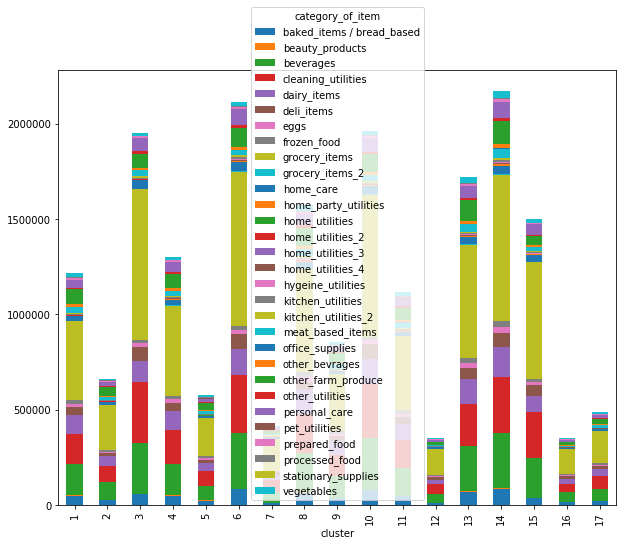

In [46]:
clus.head()
clus.plot(kind="bar", stacked=True, figsize=(10,8))

In [0]:
clus=pd.crosstab(test_final['cluster'],test_final['category_of_item'])

In [0]:
r=clus.rename(columns=str).reset_index()

# NO.OF ITEMS SELLED WRT TO EACH CLUSTER

In [71]:
r


category_of_item,cluster,baked_items / bread_based,beauty_products,beverages,cleaning_utilities,dairy_items,deli_items,eggs,frozen_food,grocery_items,grocery_items_2,home_care,home_party_utilities,home_utilities,home_utilities_2,home_utilities_3,home_utilities_4,hygeine_utilities,kitchen_utilities,kitchen_utilities_2,meat_based_items,office_supplies,other_bevrages,other_farm_produce,other_utilities,personal_care,pet_utilities,prepared_food,processed_food,stationary_supplies,vegetables
0,1,3330,161,13824,9237,7422,2358,1123,1071,27133,178,2555,344,8,112,8,176,145,533,665,1840,32,913,8216,813,3146,256,514,175,23,1469
1,2,2261,98,9926,6736,4972,1411,738,739,20581,123,1832,197,9,79,0,176,259,288,396,1004,19,580,5748,450,2222,133,371,152,4,822
2,3,3454,68,21594,17917,8376,4019,1064,1088,48373,121,4548,309,15,68,15,239,16,694,1193,1525,0,801,7893,613,4691,93,541,87,0,1230
3,4,2910,193,13280,10187,6720,2320,926,1116,29508,142,2821,349,8,124,8,243,291,455,670,1430,20,719,7493,665,3589,202,485,132,22,1032
4,5,1379,113,6210,4545,2890,1015,447,504,13064,94,1160,187,13,51,0,170,181,236,491,725,63,400,3190,323,1472,140,220,93,14,638
5,6,5876,325,27917,22035,11667,5262,1432,1576,61131,263,5602,471,17,124,26,523,386,1105,1688,1754,127,1160,10840,1081,6667,263,954,190,0,1740
6,7,976,36,6436,5818,2655,1351,273,354,15714,31,1517,121,9,44,6,145,0,320,483,382,2,242,2193,218,1606,19,255,41,0,365
7,8,3888,265,16968,11696,8234,2506,1289,1383,35085,262,3129,490,18,160,18,384,517,600,775,2102,36,996,9508,1186,3946,300,614,233,27,1745
8,9,2033,78,9353,6292,4570,1441,633,743,18476,137,1715,208,9,75,4,164,265,214,227,1270,12,441,5318,281,2106,85,294,121,15,1057
9,10,5898,165,24896,19202,10996,4795,1350,1392,53095,189,4785,426,24,79,19,289,19,752,1237,1920,70,1009,10086,835,5725,216,752,112,0,1599


In [73]:
r.dtypes

category_of_item
cluster                      category
baked_items / bread_based       int64
beauty_products                 int64
beverages                       int64
cleaning_utilities              int64
dairy_items                     int64
deli_items                      int64
eggs                            int64
frozen_food                     int64
grocery_items                   int64
grocery_items_2                 int64
home_care                       int64
home_party_utilities            int64
home_utilities                  int64
home_utilities_2                int64
home_utilities_3                int64
home_utilities_4                int64
hygeine_utilities               int64
kitchen_utilities               int64
kitchen_utilities_2             int64
meat_based_items                int64
office_supplies                 int64
other_bevrages                  int64
other_farm_produce              int64
other_utilities                 int64
personal_care                   i

In [0]:
k=r[r.cluster==5]

# these are the top ten selling items of our the sales forecast in the 5th cluster(=Q2)

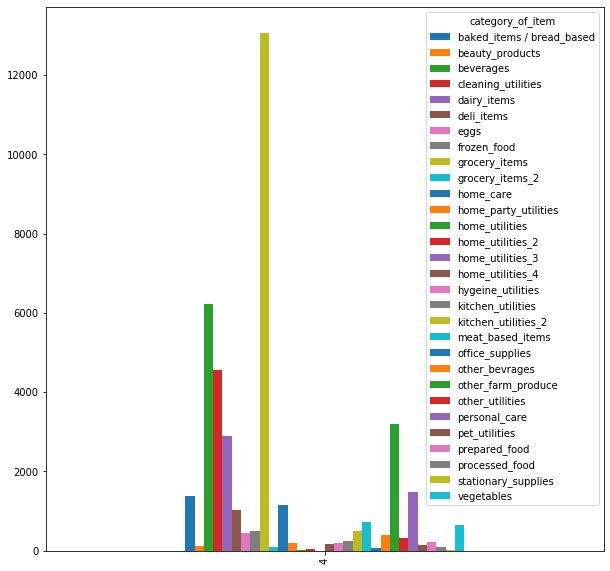

In [78]:
k.plot(kind="bar",figsize=(10,10))

# THE 5TH AND 11TH CLUSTER HAS ALMOST THE SAME SALES ,BUT WHERE AS THE 5TH CLUSTER HAS BEEN DOMINANT AMONGST THE REST OF THE CLUSTERS WHEN IT COMES TO SALES OF THE(=Q1)

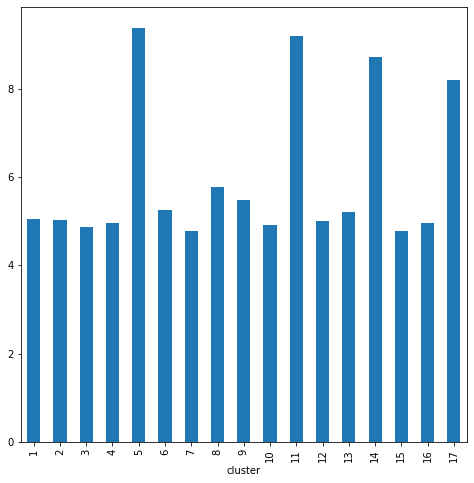

In [48]:
test_final.groupby('cluster').mean()['predictions'].plot(kind="bar",figsize=(8,8))

In [84]:
test_final[test_final['cluster'] == 5].head()

,id,date,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day,predictions
89246,89246,2019-01-02,location_44,item_99197,False,grocery_items,class_1067,0,Bengaluru,Karnataka,A,5,1,2,8.71422
89247,89247,2019-01-02,location_44,item_103520,False,grocery_items,class_1028,0,Bengaluru,Karnataka,A,5,1,2,8.71422
89248,89248,2019-01-02,location_44,item_103665,False,baked_items / bread_based,class_2712,1,Bengaluru,Karnataka,A,5,1,2,7.26069
89249,89249,2019-01-02,location_44,item_105574,False,grocery_items,class_1045,0,Bengaluru,Karnataka,A,5,1,2,8.71422
89250,89250,2019-01-02,location_44,item_105575,False,grocery_items,class_1045,0,Bengaluru,Karnataka,A,5,1,2,8.71422


In [86]:
test_final[test_final['cluster'] == 5]['item_id'].value_counts()

item_999547     14
item_1695836    14
item_1695828    14
item_1695825    14
item_1695823    14
                ..
item_452078      0
item_1150362     0
item_1150700     0
item_452079      0
item_1695991     0
Name: item_id, Length: 3828, dtype: int64

In [0]:
df=test_final[test_final['cluster'] == 5].groupby('item_id').mean()['predictions']

In [0]:
df3=test_final[test_final['cluster'] == 5].groupby('item_id').agg(lambda x:x.value_counts().index[0])['category_of_item']

In [0]:
df3= pd.DataFrame(df3)

In [117]:
df3.head()

,category_of_item
item_id,
item_1000866,grocery_items
item_1001305,grocery_items
item_1003679,grocery_items
item_1004545,cleaning_utilities
item_1004550,other_bevrages


In [118]:
final_df = df.merge(df3,'inner',on='item_id')
final_df.head()

,predictions,ratofpurchase,category_of_item
item_id,,,
item_1000866,8.714220,4.357110,grocery_items
item_1001305,8.714220,4.357110,grocery_items
item_1003679,8.714220,4.357110,grocery_items
item_1004545,6.396909,3.198454,cleaning_utilities
item_1004550,9.765282,4.882641,other_bevrages


In [120]:
final_df2=final_df.sort_values(by="predictions",ascending=False)
final_df2.head(10)

,predictions,ratofpurchase,category_of_item
item_id,,,
item_1696041,17.307085,8.653543,other_farm_produce
item_1693657,17.307085,8.653543,other_farm_produce
item_1673295,17.307085,8.653543,other_farm_produce
item_1673297,17.307085,8.653543,other_farm_produce
item_1686650,17.307085,8.653543,other_farm_produce
item_1686652,17.307085,8.653543,other_farm_produce
item_1686656,17.307085,8.653543,other_farm_produce
item_1686664,17.307085,8.653543,other_farm_produce
item_1686665,17.307085,8.653543,other_farm_produce


In [99]:
df2.head(10)

,predictions,ratofpurchase
item_id,,
item_1696041,17.307085,8.653543
item_1693657,17.307085,8.653543
item_1673295,17.307085,8.653543
item_1673297,17.307085,8.653543
item_1686650,17.307085,8.653543
item_1686652,17.307085,8.653543
item_1686656,17.307085,8.653543
item_1686664,17.307085,8.653543
item_1686665,17.307085,8.653543


# ALL THE ITEMS PRESENT IN THE 5TH CLUSTERS AND THEIR RESPECTIVE PREDICTION

In [101]:
test_final[test_final['cluster'] == 5]

,id,date,location_id,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,month,day,predictions
89246,89246,2019-01-02,location_44,item_99197,False,grocery_items,class_1067,0,Bengaluru,Karnataka,A,5,1,2,8.714220
89247,89247,2019-01-02,location_44,item_103520,False,grocery_items,class_1028,0,Bengaluru,Karnataka,A,5,1,2,8.714220
89248,89248,2019-01-02,location_44,item_103665,False,baked_items / bread_based,class_2712,1,Bengaluru,Karnataka,A,5,1,2,7.260690
89249,89249,2019-01-02,location_44,item_105574,False,grocery_items,class_1045,0,Bengaluru,Karnataka,A,5,1,2,8.714220
89250,89250,2019-01-02,location_44,item_105575,False,grocery_items,class_1045,0,Bengaluru,Karnataka,A,5,1,2,8.714220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458982,1458982,2019-01-15,location_44,item_2049037,False,kitchen_utilities_2,class_6222,0,Bengaluru,Karnataka,A,5,1,15,4.926477
1458983,1458983,2019-01-15,location_44,item_2054101,False,beverages,class_1114,0,Bengaluru,Karnataka,A,5,1,15,10.396253
1458984,1458984,2019-01-15,location_44,item_2054291,False,beverages,class_1114,0,Bengaluru,Karnataka,A,5,1,15,10.396253
1458985,1458985,2019-01-15,location_44,item_2057231,False,prepared_food,class_2904,1,Bengaluru,Karnataka,A,5,1,15,9.836545
